<a href="https://colab.research.google.com/github/minshyee/VGameDataAnalysis-Progect/blob/main/game_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA


In [4]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df = pd.read_csv('vgames2.csv')
df = df.set_index('Unnamed: 0')
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Unnamed: 0,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [154]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [155]:
df = df.dropna(axis= 0)
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [156]:
df['Platform'].value_counts()[:]

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

(31,)


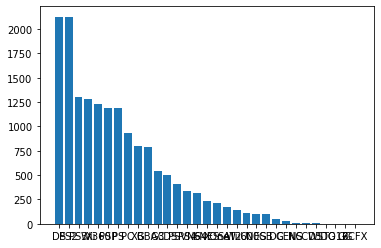

In [157]:
plt.bar(df['Platform'].value_counts().index, df['Platform'].value_counts())
print(df['Platform'].value_counts().shape)

In [159]:
df['Genre'].value_counts(), df['Genre'].value_counts().shape

(Action          3240
 Sports          2299
 Misc            1681
 Role-Playing    1465
 Shooter         1280
 Adventure       1268
 Racing          1219
 Platform         873
 Simulation       846
 Fighting         835
 Strategy         669
 Puzzle           566
 Name: Genre, dtype: int64, (12,))

In [160]:
df['Publisher'].value_counts()

Electronic Arts                 1332
Activision                       963
Namco Bandai Games               924
Ubisoft                          913
Konami Digital Entertainment     821
                                ... 
Kando Games                        1
Simon & Schuster Interactive       1
Boost On                           1
Abylight                           1
Axela                              1
Name: Publisher, Length: 575, dtype: int64

# Data Preprocessing
## Year

In [161]:
df['Year'] = df['Year'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
# sorted(df['Year'].unique()) # 연도 분포를 확인하기 위함

def convert_4digit(x):
  if x < 20:
    return x + 2000
  elif x < 100:
    return x + 1900
  else:
    return x

df['Year'] = df['Year'].apply(convert_4digit)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


## Sales Part

In [163]:
i = list(df.columns[5:])
i

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [164]:
def convert(x):
  if 'M' in x or 'K' in x:
    return x
  return str(x) + 'M'

for ind in i:
  df[ind] = df[ind].apply(convert)
  df[ind] = df[ind].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Unnamed: 0,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000


In [165]:
df.reset_index(drop = True, inplace=True)

In [171]:
df_use = df
df_use.to_csv('df_use.csv')